In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
def load_and_process_images(path_dir, class_labels, target_num_images):
    images = []
    labels = []
    min_images = float('inf')
    
    for label, class_name in enumerate(class_labels):
        class_dir = os.path.join(path_dir, class_name)
        class_images = []
        
        if not os.path.exists(class_dir):
            print(f"Directory '{class_name}' not found in '{path_dir}'. Skipping...")
            continue
        
        for jpg in os.listdir(class_dir):
            image_path = os.path.join(class_dir, jpg)
            image_high_resolution = cv2.imread(image_path)
            
            if image_high_resolution is None:
                print(f"Could not read image '{jpg}' in '{class_name}' directory. Skipping...")
                continue
            
            print(f"Reading image '{jpg}' in '{class_name}' directory...")
            image_change_color = cv2.cvtColor(image_high_resolution, cv2.COLOR_BGR2RGB)
            image_low_resolution = cv2.resize(image_change_color, (200, 200))
            class_images.append(image_low_resolution)
        
        num_images = len(class_images)
        if num_images < target_num_images:
            additional_images_required = target_num_images - num_images
            
            print(f"Class '{class_name}' has {num_images} images. {additional_images_required} additional images required to reach the target of {target_num_images} images.")

            # Data augmentation for classes with fewer images than the target
            data_generator = ImageDataGenerator(
                horizontal_flip=True,
                vertical_flip=True,
                rotation_range=270,
                fill_mode='nearest'
            )
            
            augmented_images = []
            for i in range(additional_images_required):
                random_index = np.random.randint(0, num_images)
                augmented_image = data_generator.random_transform(class_images[random_index])
                augmented_images.append(augmented_image)
            
            class_images.extend(augmented_images)
        
        images.extend(class_images[:target_num_images])
        labels.extend([label] * min(target_num_images, len(class_images)))
        min_images = min(min_images, len(class_images))
    
    return np.asarray(images), np.asarray(labels), min_images

# Define your dataset directory and class labels
dataset_directory = './Datasets/DataImages/'
class_labels = ['Catla', 'Cyprinus carpio', 'Grass Carp', 'Mori', 'Rohu', 'Silver']  # Add your own class labels here
target_num_images = 50  # Specify the desired number of images for each class

# Load and process images
images, labels, min_images = load_and_process_images(dataset_directory, class_labels, target_num_images)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


Reading image 'Catla-Body (1).JPG' in 'Catla' directory...
Reading image 'Catla-Body (10).JPG' in 'Catla' directory...
Reading image 'Catla-Body (11).JPG' in 'Catla' directory...
Reading image 'Catla-Body (12).JPG' in 'Catla' directory...
Reading image 'Catla-Body (13).JPG' in 'Catla' directory...
Reading image 'Catla-Body (14).JPG' in 'Catla' directory...
Reading image 'Catla-Body (15).JPG' in 'Catla' directory...
Reading image 'Catla-Body (16).JPG' in 'Catla' directory...
Reading image 'Catla-Body (17).JPG' in 'Catla' directory...
Reading image 'Catla-Body (18).JPG' in 'Catla' directory...
Reading image 'Catla-Body (19).JPG' in 'Catla' directory...
Reading image 'Catla-Body (2).JPG' in 'Catla' directory...
Reading image 'Catla-Body (20).JPG' in 'Catla' directory...
Reading image 'Catla-Body (3).JPG' in 'Catla' directory...
Reading image 'Catla-Body (4).JPG' in 'Catla' directory...
Reading image 'Catla-Body (5).JPG' in 'Catla' directory...
Reading image 'Catla-Body (6).JPG' in 'Catla'

In [70]:
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5]


Epoch 1/50
8/8 [==============================] - 3s 355ms/step - loss: 202.2089 - accuracy: 0.1917 - val_loss: 1.7676 - val_accuracy: 0.2833
Epoch 2/50
8/8 [==============================] - 3s 338ms/step - loss: 2.1235 - accuracy: 0.3417 - val_loss: 1.4803 - val_accuracy: 0.4667
Epoch 3/50
8/8 [==============================] - 3s 338ms/step - loss: 1.1017 - accuracy: 0.6250 - val_loss: 1.3192 - val_accuracy: 0.4833
Epoch 4/50
8/8 [==============================] - 3s 333ms/step - loss: 0.6360 - accuracy: 0.8042 - val_loss: 1.1063 - val_accuracy: 0.6000
Epoch 5/50
8/8 [==============================] - 3s 336ms/step - loss: 0.2593 - accuracy: 0.9208 - val_loss: 6.5206 - val_accuracy: 0.3167
Epoch 6/50
8/8 [==============================] - 3s 341ms/step - loss: 0.5116 - accuracy: 0.8958 - val_loss: 1.6341 - val_accuracy: 0.4667
Epoch 7/50
8/8 [==============================] - 3s 346ms/step - loss: 0.1096 - accuracy: 0.9792 - val_loss: 1.8122 - val_accuracy: 0.5833
Epoch 8/50
8/8 [==

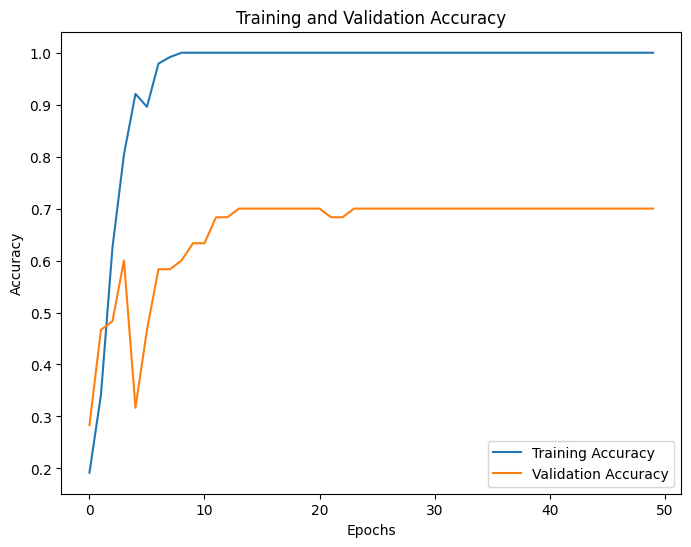

2/2 [==============================] - 0s 82ms/step - loss: 2.1425 - accuracy: 0.7000
Test Accuracy: 70.00%


In [56]:
# Define CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [68]:
import cv2
from tensorflow.keras.preprocessing import image as keras_image

# Load and preprocess the custom image
custom_image_path = './Datasets/Silver carp fish.jpg'  # Replace with your custom image path
custom_image = cv2.imread(custom_image_path)
custom_image = cv2.cvtColor(custom_image, cv2.COLOR_BGR2RGB)  # Convert color to RGB
custom_image = cv2.resize(custom_image, (200, 200))  # Resize to match the model's input shape
custom_image = custom_image.astype('float32') / 255.0  # Normalize pixel values (if necessary)

# Reshape the image to match the expected input shape for the model
custom_image = np.expand_dims(custom_image, axis=0)  # Add batch dimension

# Make predictions using the loaded model
predictions = model.predict(custom_image)
predicted_class_index = np.argmax(predictions[0])
predicted_class = class_labels[predicted_class_index]

# Display prediction result
print(f"Predicted Class: {predicted_class}")


1/1 [==============================] - 0s 23ms/step
Predicted Class: Mori
